Con base en el porcentaje de personas atendidas en servicios de salud mental, ¿puedo adivinar si el registro corresponde a una mujer o un hombre?


El modelo de regresión logística intenta predecir si un registro corresponde a una mujer o a un hombre, basándose en el porcentaje de personas atendidas en servicios de salud mental, además de información adicional como el municipio y el año.

In [ ]:
import pandas as pd

df_salud = pd.read_excel("/content/analisis_salud_mental_atendidos.xlsx")
print("Primeras filas del dataset:")
display(df_salud.head())

print("\nInformación general:")
df_salud.info()

print("\nDescripción estadística:")
display(df_salud.describe())

Primeras filas del dataset:


,Nombre del indicador,Tema,Desagregación temática,Clasificación de la desagregación temática,Año_Salud_Mental_S,Resultado_Salud_Mental_S,Municipio_Salud_Mental_S,Tipo de campo de resultado
0,Porcentaje de personas atendidas en servicios ...,Salud,Porcentaje de personas atendidas según sexo,Femenino,2021,41.8501,Popayán,Porcentaje
1,Porcentaje de personas atendidas en servicios ...,Salud,Porcentaje de personas atendidas según sexo,Femenino,2021,28.4768,Almaguer,Porcentaje
2,Porcentaje de personas atendidas en servicios ...,Salud,Porcentaje de personas atendidas según sexo,Femenino,2021,45.7576,Argelia,Porcentaje
3,Porcentaje de personas atendidas en servicios ...,Salud,Porcentaje de personas atendidas según sexo,Femenino,2021,50.5618,Balboa,Porcentaje
4,Porcentaje de personas atendidas en servicios ...,Salud,Porcentaje de personas atendidas según sexo,Femenino,2021,33.5628,Bolívar,Porcentaje



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Nombre del indicador                        336 non-null    object 
 1   Tema                                        336 non-null    object 
 2   Desagregación temática                      336 non-null    object 
 3   Clasificación de la desagregación temática  336 non-null    object 
 4   Año_Salud_Mental_S                          336 non-null    int64  
 5   Resultado_Salud_Mental_S                    336 non-null    float64
 6   Municipio_Salud_Mental_S                    336 non-null    object 
 7   Tipo de campo de resultado                  336 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 21.1+ KB

Descripción estadística:


,Año_Salud_Mental_S,Resultado_Salud_Mental_S
count,336.000000,336.000000
mean,2022.500000,39.053217
std,1.119701,14.069634
min,2021.000000,6.250000
25%,2021.750000,28.950050
50%,2022.500000,38.992500
75%,2023.250000,47.734775
max,2024.000000,84.682100


In [ ]:
print("\nValores únicos de la columna 'Clasificación de la desagregación temática':")
print(df_salud['Clasificación de la desagregación temática'].unique())

df_salud['Sexo_binario'] = df_salud['Clasificación de la desagregación temática'].apply(
    lambda x: 1 if str(x).lower().startswith('fem') else 0
)

dummies_municipio = pd.get_dummies(df_salud['Municipio_Salud_Mental_S'], prefix='Municipio', drop_first=True)
dummies_anio = pd.get_dummies(df_salud['Año_Salud_Mental_S'], prefix='Año', drop_first=True)

df_salud = pd.concat([df_salud, dummies_municipio, dummies_anio], axis=1)

print("\nColumnas del DataFrame después de crear variables dummy:")
print(df_salud.columns)



Valores únicos de la columna 'Clasificación de la desagregación temática':
['Femenino' 'Masculino']

Columnas del DataFrame después de crear variables dummy:
Index(['Nombre del indicador', 'Tema', 'Desagregación temática',
       'Clasificación de la desagregación temática', 'Año_Salud_Mental_S',
       'Resultado_Salud_Mental_S', 'Municipio_Salud_Mental_S',
       'Tipo de campo de resultado', 'Sexo_binario', 'Municipio_Argelia',
       'Municipio_Balboa', 'Municipio_Bolívar', 'Municipio_Buenos Aires',
       'Municipio_Cajibío', 'Municipio_Caldono', 'Municipio_Caloto',
       'Municipio_Corinto', 'Municipio_El Tambo', 'Municipio_Florencia',
       'Municipio_Guachené', 'Municipio_Guapi', 'Municipio_Inzá',
       'Municipio_Jambaló', 'Municipio_La Sierra', 'Municipio_La Vega',
       'Municipio_López de Micay', 'Municipio_Mercaderes', 'Municipio_Miranda',
       'Municipio_Morales', 'Municipio_Padilla', 'Municipio_Patía',
       'Municipio_Piamonte', 'Municipio_Piendamó', 'Municipio_

In [ ]:
y = df_salud['Sexo_binario']
X = df_salud[['Resultado_Salud_Mental_S'] + list(dummies_municipio.columns) + list(dummies_anio.columns)]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt


y_pred = modelo.predict(X_test_scaled)

matriz = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:\n", matriz)

print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

print("Exactitud (Accuracy):", accuracy_score(y_test, y_pred))
print("Precisión:", precision_score(y_test, y_pred))
print("Sensibilidad (Recall):", recall_score(y_test, y_pred))
print("Puntaje F1:", f1_score(y_test, y_pred))
print("Área bajo la curva ROC (AUC):", roc_auc_score(y_test, y_pred))



Matriz de Confusión:
 [[40 11]
 [19 31]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.68      0.78      0.73        51
           1       0.74      0.62      0.67        50

    accuracy                           0.70       101
   macro avg       0.71      0.70      0.70       101
weighted avg       0.71      0.70      0.70       101

Exactitud (Accuracy): 0.7029702970297029
Precisión: 0.7380952380952381
Sensibilidad (Recall): 0.62
Puntaje F1: 0.6739130434782609
Área bajo la curva ROC (AUC): 0.7021568627450981


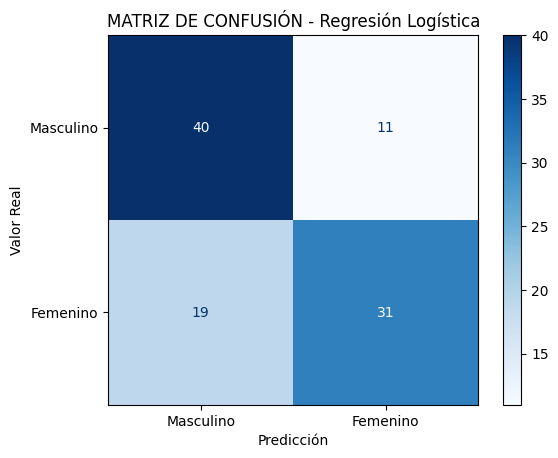

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['Masculino', 'Femenino'])
disp.plot(cmap='Blues')
plt.title('MATRIZ DE CONFUSIÓN - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


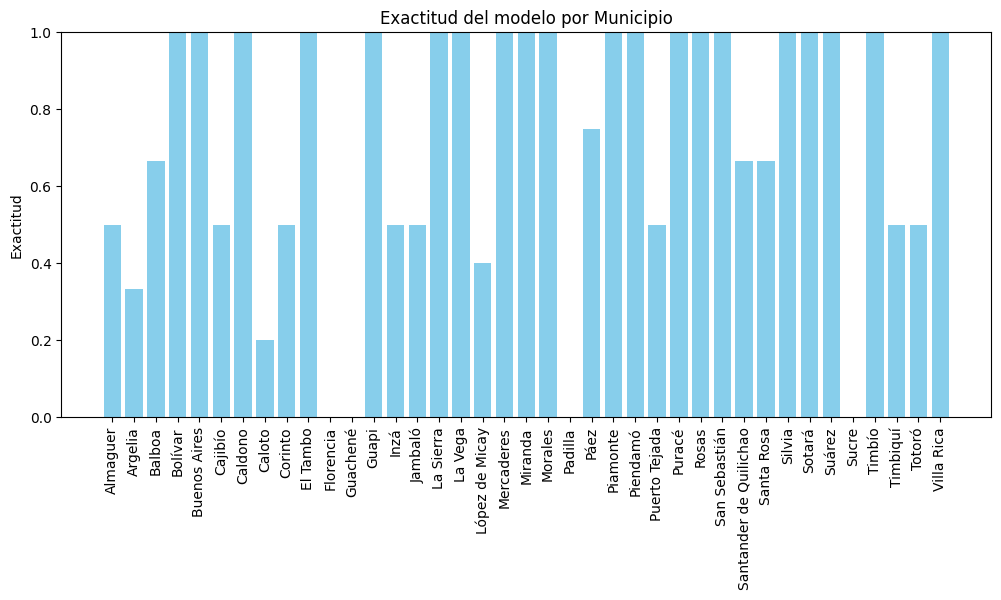

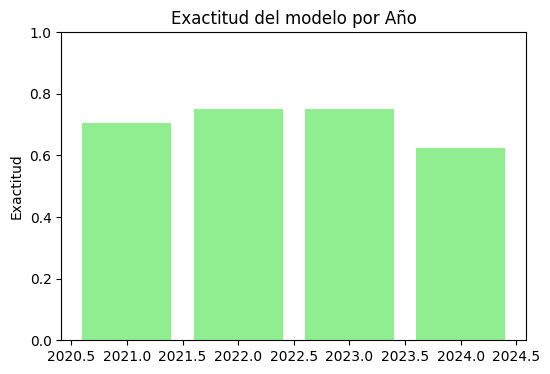

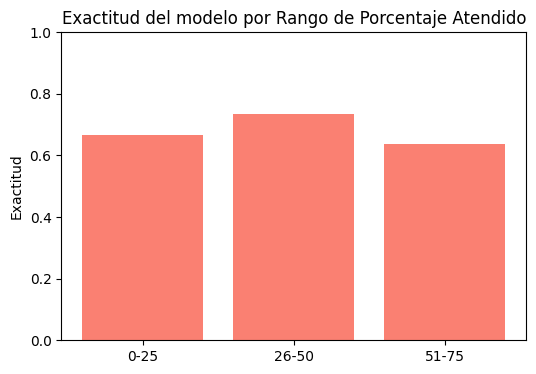

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np

# Crear listas para almacenar resultados
municipio_names = []
municipio_acc = []

años_names = []
años_acc = []

rango_labels = ['0-25', '26-50', '51-75', '76-100']
rango_acc = []




# SEGMENTACIÓN POR MUNICIPIO
municipios = df_salud['Municipio_Salud_Mental_S'].unique()

for m in municipios:
    idx = df_salud.loc[X_test.index, 'Municipio_Salud_Mental_S'] == m
    if idx.sum() == 0:
        continue
    X_muni = X_test_scaled[idx]
    y_muni = y_test[idx]
    y_pred_muni = modelo.predict(X_muni)

    municipio_names.append(m)
    municipio_acc.append(accuracy_score(y_muni, y_pred_muni))

# Graficar municipios
plt.figure(figsize=(12,5))
plt.bar(municipio_names, municipio_acc, color='skyblue')
plt.xticks(rotation=90)
plt.ylabel('Exactitud')
plt.title('Exactitud del modelo por Municipio')
plt.ylim(0,1)
plt.show()



# SEGMENTACIÓN POR AÑO
años = df_salud['Año_Salud_Mental_S'].unique()

for a in años:
    idx = df_salud.loc[X_test.index, 'Año_Salud_Mental_S'] == a
    if idx.sum() == 0:
        continue
    X_ano = X_test_scaled[idx]
    y_ano = y_test[idx]
    y_pred_ano = modelo.predict(X_ano)

    años_names.append(a)
    años_acc.append(accuracy_score(y_ano, y_pred_ano))

# Graficar años
plt.figure(figsize=(6,4))
plt.bar(años_names, años_acc, color='lightgreen')
plt.ylabel('Exactitud')
plt.title('Exactitud del modelo por Año')
plt.ylim(0,1)
plt.show()



# SEGMENTACIÓN POR RANGO DE PORCENTAJE
df_salud['Rango_Porcentaje'] = pd.cut(df_salud['Resultado_Salud_Mental_S'], bins=[0,25,50,75,100], labels=rango_labels)

for r in rango_labels:
    idx = df_salud.loc[X_test.index, 'Rango_Porcentaje'] == r
    if idx.sum() == 0:
        rango_acc.append(np.nan)
        continue
    X_rango = X_test_scaled[idx]
    y_rango = y_test[idx]
    y_pred_rango = modelo.predict(X_rango)

    rango_acc.append(accuracy_score(y_rango, y_pred_rango))

# Graficar rangos de porcentaje
plt.figure(figsize=(6,4))
plt.bar(rango_labels, rango_acc, color='salmon')
plt.ylabel('Exactitud')
plt.title('Exactitud del modelo por Rango de Porcentaje Atendido')
plt.ylim(0,1)
plt.show()


#Exactitud (Accuracy): 70%  

El modelo acierta el 70 % de las veces al predecir correctamente si una persona pertenece a cierta clase (mujer u hombre).

#Precisión: 0.74
Cuando el modelo dice “0 o 1” , tiene razón el 74 % de las veces.

#Sensibilidad (Recall): 0.62

De todos los verdaderos casos positivos (mujeres reales o hombres), detecta el 62 %.

#F1: 0.67
balance entre precisión y sensibilidad. 0.67 indica un rendimiento aceptable, sin que el modelo se incline demasiado a cometer solo un tipo de error

#AUC(distinguir entre sexos): 0.70
Mide la capacidad del modelo para distinguir entre las dos clases.
Un valor de 0.5 sería azar, y 1.0 sería perfecto.

El modelo logra predecir el sexo con un 70% de exactitud usando los porcentajes de atención en salud mental. Esto indica que existen diferencias por género en la atención. Los registros con mayor porcentaje de atención tienden a estar más asociados a mujeres, mientras que los porcentajes más bajos suelen estar más relacionados con hombres.